In [35]:
import polars as pl
import pandas as pd
import numpy as np 
import pycountry

import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

import warnings

warnings.filterwarnings("ignore")

In [2]:
pl_data = pl.read_csv("/Users/kurmangazykarabekov/Desktop/собесы/12Go Asia/data.csv")

**First look at the data**

In [3]:
pl_data.head(2)

bid,channel,createdon,cust_name,date_of_birth,email,email_domain_score,email_score,godate,insurance_flg,ip,isFraud,nationality,netprice_thb,p_attempts,paidon,passenger_passport_score,passenger_score,payer_country,payer_name,proxy,recent_abuse,role_id,seats,tor,useragent,usr_name,vehclass_id,vpn
i64,str,str,str,str,str,f64,f64,str,i64,str,i64,str,f64,i64,str,f64,f64,str,str,f64,f64,str,i64,f64,str,str,str,f64
6524445,"""affiliate""","""2021-05-01 00:…","""Tiffany Stephe…","""1999-07-04""","""ryanbrianna@ou…",0.0,10.0,"""2021-07-01 07:…",0,"""213.89.6.2""",0,"""SE""",115.0,0,"""2021-06-29 16:…",0.0,0.0,"""SE""","""Tiffany Stephe…",null,null,"""user""",1,null,"""Phone,sv,SEK""","""Tiffany Stephe…","""van""",null
5800338,"""affiliate""","""2021-05-01 00:…","""Amanda Cooper""","""2002-06-07""","""dustin85@gmail…",0.0,10.0,"""2021-05-29 13:…",1,"""124.106.133.17…",0,"""TH""",985.180176,0,"""2021-05-25 03:…",0.0,0.0,"""NU""",null,0.0,0.0,"""user""",1,0.0,"""Phone,en,PHP""","""Amanda Cooper""","""avia""",0.0


**Converting some columns to date**

In [4]:
pl_data = (
    pl_data.with_columns(
        pl.col("createdon")
        .str.strptime(
            pl.Datetime,
            format="%Y-%m-%d %H:%M:%S%z",
        )
        .cast(pl.Datetime("us", time_zone="UTC"))
    )
    .with_columns(
        pl.col("date_of_birth")
        .str.strptime(
            pl.Datetime,
            format="%Y-%m-%d",
        )
        .cast(pl.Datetime("us", time_zone="UTC"))
    )
    .with_columns(
        pl.col("godate")
        .str.strptime(
            pl.Datetime,
            format="%Y-%m-%d %H:%M:%S%z",
        )
        .cast(pl.Datetime("us", time_zone="UTC"))
    )
    .with_columns(
        pl.col("paidon")
        .str.strptime(pl.Datetime, format="%Y-%m-%d %H:%M:%S.%f%z", strict=False)
        .cast(pl.Datetime("us", time_zone="UTC"))
    )
)

/var/folders/l9/p8dmtkcx40g8jtfzctxzg4km0000gn/T/ipykernel_79773/1105408612.py:28: ChronoFormatWarning: Detected the pattern `.%f` in the chrono format string. This pattern should not be used to parse values after a decimal point. Use `%.f` instead. See the full specification: https://docs.rs/chrono/latest/chrono/format/strftime
  .str.strptime(pl.Datetime, format="%Y-%m-%d %H:%M:%S.%f%z", strict=False)


In [5]:
pl_data = pl_data.sort("createdon", descending=False)

In [19]:
print(f"Unique count users {pl_data.select(pl.col('bid').n_unique())}")
print(f"Count users {pl_data.select(pl.col('bid').count())}")

Unique count users shape: (1, 1)
┌─────────┐
│ bid     │
│ ---     │
│ u32     │
╞═════════╡
│ 2376692 │
└─────────┘
Count users shape: (1, 1)
┌─────────┐
│ bid     │
│ ---     │
│ u32     │
╞═════════╡
│ 3464222 │
└─────────┘


In [16]:
pl_data.describe()

describe,bid,channel,createdon,cust_name,date_of_birth,email,email_domain_score,email_score,godate,insurance_flg,ip,isFraud,nationality,netprice_thb,p_attempts,paidon,passenger_passport_score,passenger_score,payer_country,payer_name,proxy,recent_abuse,role_id,seats,tor,useragent,usr_name,vehclass_id,vpn,createdon_date
str,f64,str,str,str,str,str,f64,f64,str,f64,str,f64,str,f64,f64,str,f64,f64,str,str,f64,f64,str,f64,f64,str,str,str,f64,str
"""count""",3.464222e6,"""3346074""","""3464222""","""3464221""","""3429026""","""3464222""",3.464222e6,3.464222e6,"""3464222""",3.464222e6,"""3463990""",3.464222e6,"""3464181""",3.464222e6,3.464222e6,"""3464217""",3.464222e6,3.464222e6,"""3464148""","""2167504""",1.755741e6,1.755741e6,"""3464222""",3.464222e6,1.755741e6,"""3463990""","""3459177""","""3464222""",1.755741e6,"""3464222"""
"""null_count""",0.0,"""118148""","""0""","""1""","""35196""","""0""",0.0,0.0,"""0""",0.0,"""232""",0.0,"""41""",0.0,0.0,"""5""",0.0,0.0,"""74""","""1296718""",1.708481e6,1.708481e6,"""0""",0.0,1.708481e6,"""232""","""5045""","""0""",1.708481e6,"""0"""
"""mean""",7.7347e6,null,null,null,null,null,0.000191,3.341505,null,0.233398,null,0.002259,null,741.663618,0.11171,null,0.059503,0.124371,null,null,0.590106,0.272676,null,1.835898,0.000661,null,null,null,0.173555,null
"""std""",1.2386e6,null,null,null,null,null,0.075601,3.929717,null,0.422994,null,0.047473,null,24743.221246,0.573229,null,1.334742,2.94797,null,null,0.491814,0.445336,null,1.042537,0.025706,null,null,null,0.378727,null
"""min""",5.590536e6,"""affiliate""","""2021-04-30 17:…","""AARON ANDERSON…","""1936-01-28 00:…","""BARNETTASHLEY@…",0.0,0.0,"""2019-12-24 07:…",0.0,"""0.0.0.0""",0.0,"""AB""",-4836.958984,0.0,"""2019-12-21 09:…",0.0,0.0,"""AD""","""AARON ABBOTT""",0.0,0.0,"""accountant""",1.0,0.0,"""Desktop,ar,CAD…","""AARON BAKER""","""avia""",0.0,"""2021-04-30"""
"""25%""",6.66149e6,null,null,null,null,null,0.0,0.0,null,0.0,null,0.0,null,260.0,0.0,null,0.0,0.0,null,null,0.0,0.0,null,1.0,0.0,null,null,null,0.0,null
"""50%""",7.734956e6,null,null,null,null,null,0.0,2.0,null,0.0,null,0.0,null,480.0,0.0,null,0.0,0.0,null,null,1.0,0.0,null,2.0,0.0,null,null,null,0.0,null
"""75%""",8.807322e6,null,null,null,null,null,0.0,5.0,null,0.0,null,0.0,null,800.0,0.0,null,0.0,0.0,null,null,1.0,1.0,null,2.0,0.0,null,null,null,0.0,null
"""max""",9.880728e6,"""unknown""","""2023-11-30 16:…","""zoe horton""","""2020-02-06 00:…","""zzuniga@me.com…",30.0,10.0,"""2035-12-16 11:…",1.0,"""99.99.63.19""",1.0,"""ZZ""",1.7319928e7,144.0,"""2035-12-14 03:…",30.0,70.0,"""ZW""","""ธนาคารไทยพาณิช…",1.0,1.0,"""visitor""",140.0,1.0,"""Tablet,zh,VND""","""zachary young""","""van""",1.0,"""2023-11-30"""


In [11]:
pl_data = pl_data.with_columns(pl.col("createdon").dt.date().alias("createdon_date"))

In [ ]:
grouped_data_fraud = pl_data.group_by("createdon_date").agg(
    pl.sum("isFraud").alias("Amount_Fraud"),
    pl.count("bid").alias("Amount_Users_transaction"),
)

### Time Series Analysis
* Based on the total number of transactions and fraudulent transactions. It can be seen that the year 2023 is a high activity of users, that is, the service is becoming popular and thus the number of frauds has increased accordingly 
* 2023-10-25 is the date for spliting into training and testing the model, since we take the entire year 2022 and active fraud attacks in 2023

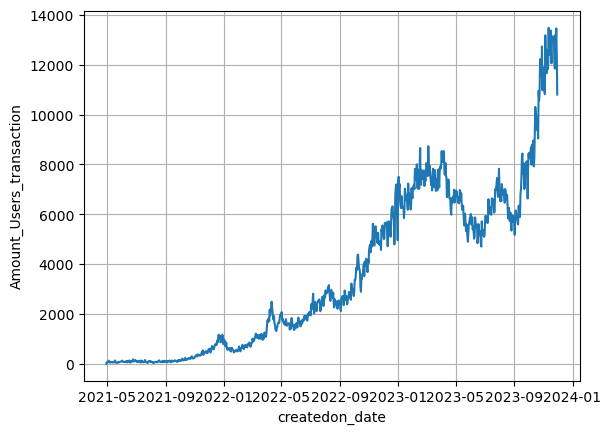

In [36]:
sns.lineplot(
    data=grouped_data_fraud.to_pandas(),
    x="createdon_date",
    y="Amount_Users_transaction",
)
plt.grid()
plt.show()

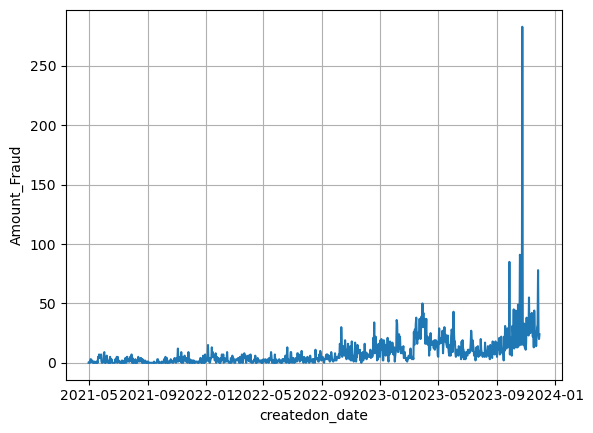

In [ ]:
sns.lineplot(
    data=grouped_data_fraud.to_pandas(),
    x="createdon_date",
    y="Amount_Fraud",
)
plt.grid()
plt.show()

## Fraud analysis by attraction channels

### Rating of channels by the absolute amount of fraud:
1. **direct**: 2402 cases
2. **organic**: 1860 cases
3. **affiliate**: 1,549 cases
4. **paid**: 1040 cases

### Channel rating by fraud_rate (percentage of fraud):
- **direct**: 0.56% - the highest percentage
- **organic**: 0.34%
- **email**: 0.82% - very high percentage, but low number of transactions
- **affiliate**: 0.18%

### Key observations:
* The partner channel has no fraudulent transactions (0%), but the total number of transactions is only 20
* The "email" channel shows the highest percentage of fraud (0.82%), with a small number of transactions (10,505)
* Direct traffic leads both in terms of the absolute number of fraud and percentage

### Channel transaction volume:
1. paid: 1,077,484 (the largest amount)
2. affiliate: 863,866
3. organic: 542,862
4. direct: 435,377

### Conclusions for the anti-fraud system:
1. Enhanced channel monitoring is required:
- Direct (high% and quantity)
- Email (high%)
2. It is possible to set different thresholds for different channels

In [ ]:
(
    pl_data.group_by("channel")
    .agg(
        pl.sum("isFraud").alias("sum_isFraud"),
        pl.count("bid").alias("total_transactions"),
        (pl.sum("isFraud") / pl.count("bid") * 100).alias("fraud_rate"),
    )
    .sort("sum_isFraud", descending=True)
).head(20)

channel,sum_isFraud,total_transactions,fraud_rate
str,i64,u32,f64
"""direct""",2402,435377,0.551706
"""organic""",1860,542862,0.342629
"""affiliate""",1549,863866,0.17931
"""paid""",1040,1077484,0.096521
"""referral""",307,152190,0.201722
"""unknown""",304,263770,0.115252
null,277,118148,0.234452
"""email""",86,10505,0.818658
"""partner""",0,20,0.0


### Fraud and insurance analysis

### Statistics:
1. Without insurance (insurance_flg = 0):
- Number of frauds: 4,254
- Total transactions: 2,655,679
- Fraud rate: 0.16%

2. With insurance (insurance_flg = 1):
- Number of frauds: 3,571
- Total transactions: 808,543
- Fraud rate: 0.44%

### Key observations:
- Insurance transactions have almost 3 times higher fraud rate (0.44% vs 0.16%)
- Most transactions (77%) take place without insurance
- Despite the lower number of insurance transactions, they contain almost the same number of fraud cases.

### Withdrawal for the anti-fraud system:
- The availability of insurance can be an important signal for detecting potential fraud
- More thorough verification of insurance transactions is recommended

In [42]:
(
    pl_data.group_by("insurance_flg")
    .agg(
        pl.sum("isFraud").alias("sum_isFraud"),
        pl.count("bid").alias("total_transactions"),
        (pl.sum("isFraud") / pl.count("bid") * 100).alias("fraud_rate"),
    )
    .sort("sum_isFraud", descending=True)
)

insurance_flg,sum_isFraud,total_transactions,fraud_rate
i64,i64,u32,f64
0,4254,2655679,0.160185
1,3571,808543,0.441659


### Fraud analysis by payer countries (top 20)

### Top 5 countries by the absolute amount of fraud:
1. **NU**: 3,395 cases (25.5% of transactions)
2. **US**: 1,680 cases (1.43% of transactions)
3. **CA**: 433 cases (0.88% of transactions)
4. **JP**: 300 cases (0.94% of transactions)
5. **AT**: 202 cases (0.63% of transactions)

### Top 5 countries by fraud_rate (among countries with a significant number of transactions):
1. **MX**: 1.43% (69 cases out of 4,830 transactions)
2. **US**: 1.43% (1,680 cases out of 117,571 transactions)
3. **AR**: 1.15% (86 cases out of 7,461 transactions)
4. **JP**: 0.94% (300 cases out of 31,715 transactions)
5. **CA**: 0.88% (433 cases out of 49,159 transactions)

### Key observations:
- **NU** (Not Known/Unknown) leads in the number of scams (3,395) with a high fraud_rate (0.25%)
- Developed countries (US, CA, JP) show a high percentage of fraud
- Some European countries (DE, GB, FR) have relatively low fraud_rate (< 0.1%)
- Latin American countries (MX, AR) show high fraud_rate with a small volume of transactions

In [ ]:
(
    pl_data.group_by("payer_country")
    .agg(
        pl.sum("isFraud").alias("sum_isFraud"),
        pl.count("bid").alias("total_transactions"),
        (pl.sum("isFraud") / pl.count("bid") * 100).alias("fraud_rate"),
    )
    .sort("sum_isFraud", descending=True)
).head(20)

payer_country,sum_isFraud,total_transactions,fraud_rate
str,i64,u32,f64
"""NU""",3395,1344799,0.252454
"""US""",1680,117571,1.428924
"""CA""",433,49159,0.880815
"""JP""",300,31715,0.945925
"""AT""",202,31923,0.632773
"""DE""",195,271934,0.071709
"""GB""",171,244118,0.070048
"""AU""",147,86740,0.169472
"""FR""",125,228024,0.054819


In [14]:
def convert_iso2_to_iso3(iso2_code):
    try:
        return pycountry.countries.get(alpha_2=iso2_code).alpha_3
    except:
        return None

In [ ]:
fraud_by_country = (
    pl_data.group_by("payer_country")
    .agg(pl.sum("isFraud").alias("sum_isFraud"), pl.count().alias("total_transactions"))
    .sort("sum_isFraud", descending=True)
).to_pandas()

In [13]:
fraud_by_country["fraud_rate"] = (
    fraud_by_country["sum_isFraud"] / fraud_by_country["total_transactions"] * 100
)

In [15]:
fraud_by_country["iso3"] = fraud_by_country["payer_country"].apply(convert_iso2_to_iso3)

In [18]:
fraud_by_country

,payer_country,sum_isFraud,total_transactions,fraud_rate,iso3
0,NU,3395,1344799,0.252454,NIU
1,US,1680,117571,1.428924,USA
2,CA,433,49159,0.880815,CAN
3,JP,300,31715,0.945925,JPN
4,AT,202,31923,0.632773,AUT
...,...,...,...,...,...
193,NR,0,1,0.000000,NRU
194,YT,0,1,0.000000,MYT
195,ZW,0,17,0.000000,ZWE
196,KI,0,3,0.000000,KIR


In [22]:
fig = px.choropleth(
    fraud_by_country,
    locations="iso3", 
    locationmode="ISO-3",
    color="sum_isFraud",
    hover_name="payer_country",
    hover_data=[
        "total_transactions",
        "fraud_rate",
    ],
    color_continuous_scale="Reds",
    title="Distribution of Fraudulent Transactions by Country",
)

In [49]:
fig.update_layout(
    title_x=0.5,
    geo=dict(
        showframe=False,
        showcoastlines=True,
        projection_type="equirectangular",
        showland=True,
        landcolor="lightgray",
        showocean=True,
        oceancolor="lightblue",
    ),
    width=1000,
    height=600,
)

fig.show()

# Visualization of fraud distribution by country

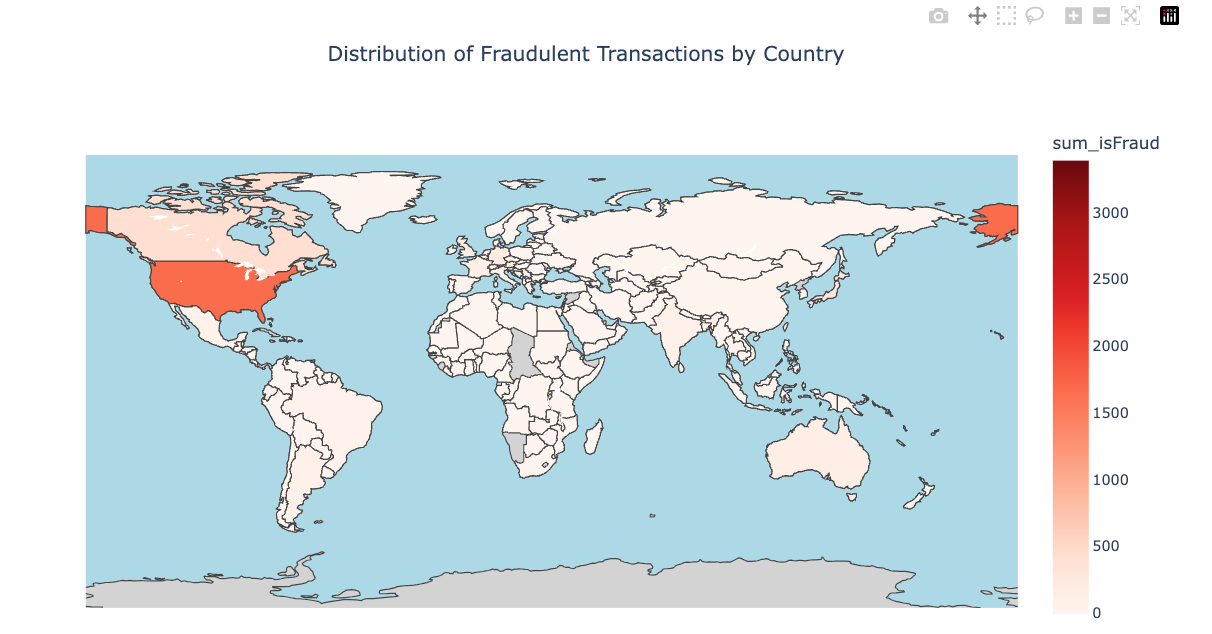

### Fraud analysis by type of transport

### Statistics on modes of transport:
1. **Air transportation (avia)**:
- Fraud: 3,870
- Total transactions: 178,673
- Fraud rate: 2.17% (the highest!)

2. **Buses (bus)**:
- Fraud: 1,804
- Total transactions: 1,346,000
- Fraud rate: 0.13%
  
3. **Ferries**:
- Fraud: 1,034
- Total transactions: 1,009,565
- Fraud rate: 0.10%

### Key observations:
- **Air transportation** significantly leads in fraud_rate (2.17%), which is ~16 times higher than that of buses
- **Buses and ferries** have the highest number of transactions, but relatively low fraud_rate
- **Insurance services** (insurance) show a high fraud_rate (0.52%) with a small number of transactions
 Some types of transport (rail pass, day trip, current) have no recorded cases of fraud, but the number of transactions is minimal.

In [43]:
(
    pl_data.group_by("vehclass_id")
    .agg(
        pl.sum("isFraud").alias("sum_isFraud"),
        pl.count("bid").alias("total_transactions"),
        (pl.sum("isFraud") / pl.count("bid") * 100).alias("fraud_rate"),
    )
    .sort("sum_isFraud", descending=True)
).head(20)

vehclass_id,sum_isFraud,total_transactions,fraud_rate
str,i64,u32,f64
"""avia""",3870,178673,2.165968
"""bus""",1804,1346000,0.134027
"""ferry""",1034,1009565,0.10242
"""train""",837,637773,0.131238
"""van""",164,219223,0.07481
"""charter""",94,68739,0.136749
"""insurance""",22,4235,0.519481
"""daytrip""",0,4,0.0
"""railpass""",0,9,0.0


<AxesSubplot: >

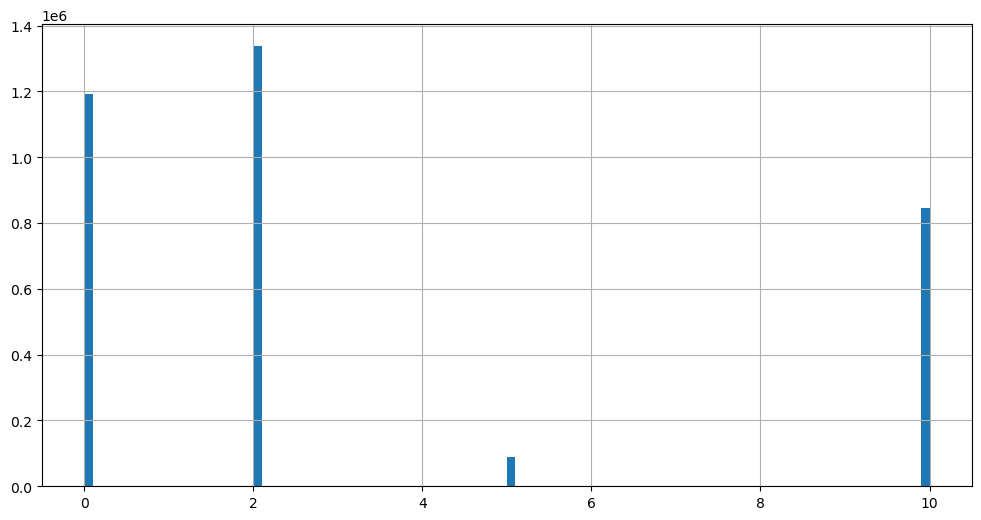

In [ ]:
pl_data["email_score"].to_pandas().hist(bins=100, figsize=(12, 6))

### Price distribution analysis for fraudulent and ordinary transactions

### Regular transactions:
1. **Shape of the distribution**:
- Close to the normal distribution
- A clear peak near the value 6-7 (log scale)
- A relatively narrow range (standard deviation = 0.876)

2. **Key indicators**:
- Median (50%): 6.21
- Average: 6.17
- 75% of transactions are in the range from 5.62 to 6.69

### Fraudulent transactions:
1. **Shape of distribution**:
- Wider and more uneven distribution
- Multiple peaks
- A much larger spread (standard deviation = 1.39)

2. **Key indicators**:
- Median (50%): 7.36
- Average: 7.41
- Noticeably higher values than for regular transactions
- The maximum value (11.56) is significantly higher than for regular (8.67)

### Key differences:
1. **Average price**:
- Fraudulent transactions are on average 1.24 log points more expensive
- This indicates the tendency of fraudsters to more expensive transactions

2. **Price spread**:
- Fraudulent transactions have 1.6 times more spread
- A wider price range may be an indicator of suspicious activity

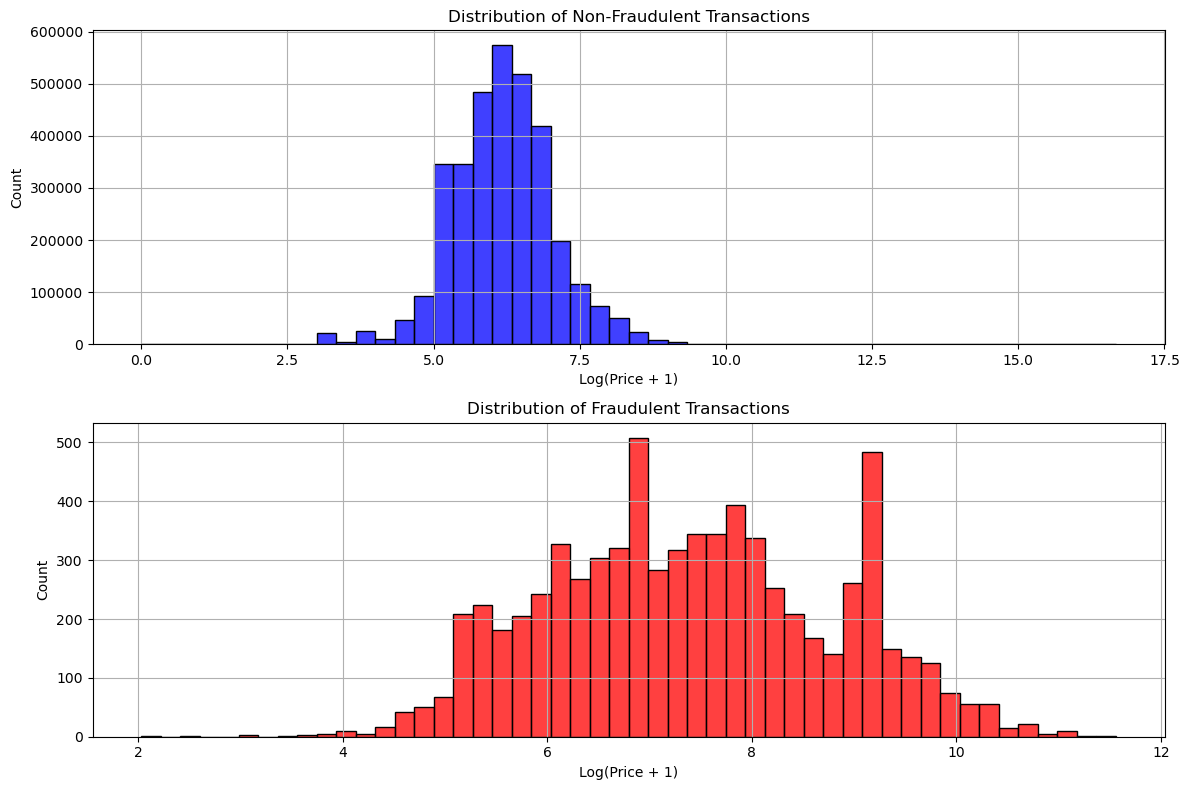


Statistics for regular transactions:
count    3.366225e+06
mean     6.173864e+00
std      8.757774e-01
min      1.099478e-05
25%      5.615039e+00
50%      6.208590e+00
75%      6.690842e+00
max      1.666737e+01
Name: log_price, dtype: float64

Statistics for fraudulent transactions:
count    7179.000000
mean        7.410548
std         1.392035
min         2.027170
25%         6.388561
50%         7.361058
75%         8.417824
max        11.559580
Name: log_price, dtype: float64


In [52]:
data_for_plot = (
    pl_data.filter(pl.col("netprice_thb") > 0)
    .select([pl.col("netprice_thb"), pl.col("isFraud")])
    .to_pandas()
)

data_for_plot["log_price"] = data_for_plot["netprice_thb"].apply(
    lambda x: np.log(x + 1)
)

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8))

sns.histplot(
    data=data_for_plot[data_for_plot["isFraud"] == 0],
    x="log_price",
    bins=50,
    ax=ax1,
    color="blue",
)
ax1.set_title("Distribution of Non-Fraudulent Transactions")
ax1.set_xlabel("Log(Price + 1)")
ax1.set_ylabel("Count")
ax1.grid(True)

sns.histplot(
    data=data_for_plot[data_for_plot["isFraud"] == 1],
    x="log_price",
    bins=50,
    ax=ax2,
    color="red",
)
ax2.set_title("Distribution of Fraudulent Transactions")
ax2.set_xlabel("Log(Price + 1)")
ax2.set_ylabel("Count")
ax2.grid(True)

plt.tight_layout()
plt.show()

print("\nStatistics for regular transactions:")
print(data_for_plot[data_for_plot["isFraud"] == 0]["log_price"].describe())
print("\nStatistics for fraudulent transactions:")
print(data_for_plot[data_for_plot["isFraud"] == 1]["log_price"].describe())

# Final data analysis for the anti-fraud system

## Data separation
- Date of separation: 2023-10-25
- Training period: until 2023-10-25
- Test period: after 2023-10-25

## Basic observations on sales channels
1. **Direct channel**:
- The largest number of frauds (2,402 cases)
- The highest fraud rate (0.56%)
- Requires enhanced monitoring

2. **Email (email)**:
- High fraud rate (0.82%)
- Low transaction volume
- Potentially risky channel

## Geographical distribution
1. **Top countries in terms of fraud**:
- NU (Unknown): 3,395 cases (25.5%)
- US: 1,680 cases (1.43%)
- CA: 433 cases (0.88%)

2. **Countries with high fraud rate**:
- Mexico (1.43%)
- United States (1.43%)
- Argentina (1.15%)

## Analysis by type of transport
1. **Air transportation**:
- The largest number of scams (3,870)
- The highest fraud rate (2.17%)
- The priority focus for monitoring

2. **Buses and ferries**:
- High transaction volume
- Low fraud rate (about 0.13%)
- Less stringent checks can be applied

## Price characteristics
1. **Regular transactions**:
- Median log(price): 6.21
- Standard deviation: 0.876
- Narrower and more stable distribution

2. **Fraudulent transactions**:
- Median log(price): 7.36
- Standard deviation: 1.39
- The trend towards higher amounts

## Additional risk factors
1. **Insurance**:
- Insurance transactions have 3 times higher fraud rate
- 44% of fraudulent transactions include insurance

2. **Time patterns**:
- Noticeable increase in fraud by the end of 2023
- Changing patterns requires adaptation of models

## Recommendations for the anti-fraud system
1. **Priority monitoring**:
- Air transportation
- Direct sales
- Insurance
transactions - Transactions with an unspecified country (NU)

2. **Price Triggers**:
- Special attention to transactions with log(price) > 8.0
- Additional verification for very expensive transactions

3. **Geographic Strategy**:
- Enhanced verification for countries with high fraud rates
- Adapted rules for different regions

4. **Sales Channels**:
- Different levels of verification for different channels
- Special attention to email and direct channels